[]

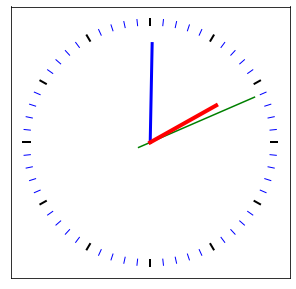

In [1]:
import matplotlib.pyplot as plt
from time import sleep, time, localtime

# Constant are CAPitalized in python by convention
from cmath import  pi as PI, e as E
# correcting python notations j => I  
I = complex("j")

# maplotlib does not plot lines using the classical
# (x0,y0), (x1,y1) convention
# but prefers (x0,x1) (y0,y1)
to_xx_yy = lambda c1,c2 : [(c1.real, c2.real), (c1.imag, c2.imag)] 

# black magic
plt.ion()
plt.show()

# fixing the weired / behaviour in python 2 by forcing cast in float
# 2 * PI = one full turn in radians (SI) second makes a
# 60th of a turn per seconds
# an arc is a fraction of turn
rad_per_sec = 2.0 * PI /60.0
# 60 times slower
rad_per_min = rad_per_sec / 60
# wall clock are not on 24 based because human tends to
# know if noon is passed
rad_per_hour = rad_per_min / 12

# I == rectangular coordonate (0,1) in complex notation
origin_vector_hand = I

size_of_sec_hand = .9
size_of_min_hand = .8
size_of_hour_hand = .6

# Euler's Formula is used to compute the rotation
# using units in names to check unit consistency
# rotation is clockwise (hence the minus)
# Euler formular requires a measure of angle (rad)
rot_sec = lambda sec : E ** (-I * sec * rad_per_sec )
rot_min = lambda min : E ** (-I *  min * rad_per_min )
rot_hour = lambda hour : E ** (-I * hour * rad_per_hour )
fig,ax = plt.subplots(figsize=(5,5))
# drawing the ticks and making them different every
# division of 5
for n in range(60):
    ax.plot(
        *to_xx_yy(
            origin_vector_hand * rot_sec(n),
            .95 * I * rot_sec(n)
        )+[n% 5 and 'b-' or 'k-'],
        lw= n% 5 and 1 or 2
    )
    plt.draw()
# computing the offset between the EPOCH and the local political convention of time
diff_offset_in_sec = (time() % (24*3600)) - localtime()[3]*3600 -localtime()[4] * 60.0 - localtime()[5]   
n=0


n+=1
t = time()
t=1618236811+10000
# sexagesimal base conversion
s= t%60
m = m_in_sec = t%(60 * 60)
h = h_in_sec = (t- diff_offset_in_sec)%(24*60*60)
# applying a rotation AND and homothetia for the vectors expressent as (complex1, ccomplex2)
# using the * operator of complex algebrae to do the job

ax.plot( *to_xx_yy(
        -.1 * origin_vector_hand * rot_sec(s),
        size_of_sec_hand * origin_vector_hand * rot_sec(s)) + ['g'])
ax.plot( *to_xx_yy(0, size_of_min_hand * origin_vector_hand * rot_min( m )) + ['b-'] , lw= 3)
ax.plot( *to_xx_yy(0, size_of_hour_hand * origin_vector_hand * rot_hour(h)) +[ 'r-'] , lw= 4)
ax.set_yticks([])
ax.set_xticks([])
# plt.pause(.1)
# ## black magic : remove elements on the canvas.
# l.pop().remove()
# j.pop().remove()
# k.pop().remove()
# if not n % 1000:
#     ### conversion in sexagesimal base
#     print(int(h/60.0/60.0)),
#     print(int(m/60.0)),
#     print(int(s))
# if n == 100:
#     n=0

In [2]:
t

1618246811